### Load CSV file into memory

In [11]:
import pandas as pd
import seaborn

data = pd.read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv')

In [12]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


### Convert datetime and add some useful columns

In [18]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [19]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [20]:
data['Day of Month'] = data['Date/Time'].map(lambda date: date.day)

In [22]:
data.head()

,Date/Time,Lat,Lon,Base,Day of Month
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1


In [0]:
data['Weekday'] = data['Date/Time'].map(lambda date: date.weekday())
data['Hour'] = data['Date/Time'].map(lambda date: date.hour)

In [24]:
data.head()

,Date/Time,Lat,Lon,Base,Day of Month,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


# Analysis

### Analyze the Day of Month

[]

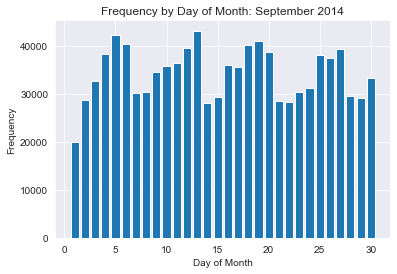

In [29]:
import matplotlib.pyplot as plt

plt.hist(data['Day of Month'], bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of Month: September 2014')
plt.plot()

In [39]:
counts_by_day_of_month = data.groupby('Day of Month').apply(lambda rows: len(rows))

In [40]:
counts_by_day_of_month

Day of Month
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

<BarContainer object of 30 artists>

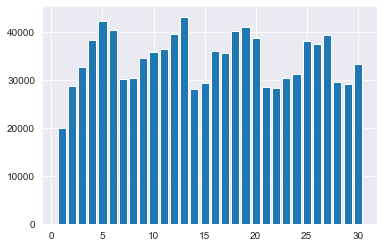

In [43]:
plt.bar(range(1, 31), counts_by_day_of_month)

In [0]:
counts_by_day_of_month_sorted = counts_by_day_of_month.sort_values()

In [45]:
counts_by_day_of_month_sorted

Day of Month
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

''

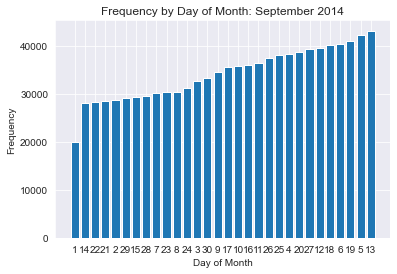

In [46]:
plt.bar(range(1, 31), counts_by_day_of_month_sorted)
plt.xticks(range(1, 31), counts_by_day_of_month_sorted.index)
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of Month: September 2014')

## Analyze the Hour

[]

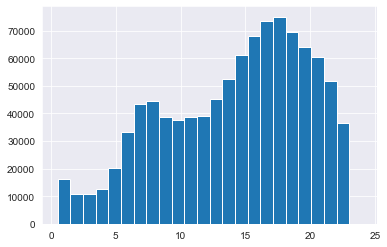

In [80]:
plt.hist(data['Hour'], bins=24, range=(.5, 24))
plt.plot()

# Analyze the Weekday


[]

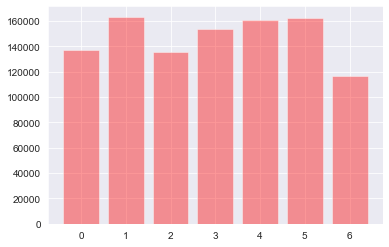

In [54]:
plt.hist(data['Weekday'], bins=7, range=(-.5, 6.5), rwidth=.8, color='red', alpha=.4)
plt.xticks(range(7), data['Weekday'].unique())
plt.plot()

# Cross Analysis (Hour, Day of Week)

In [72]:
by_cross = data.groupby(['Weekday', 'Hour']).apply(lambda rows: len(rows)).unstack()
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


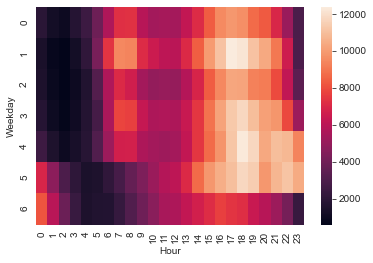

In [71]:
seaborn.heatmap(by_cross);

# By Latitude and Longitude

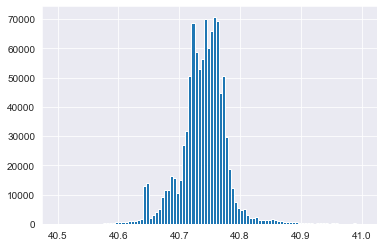

In [68]:
plt.hist(data['Lat'], bins=100, range=(40.5, 41))
plt.plot();

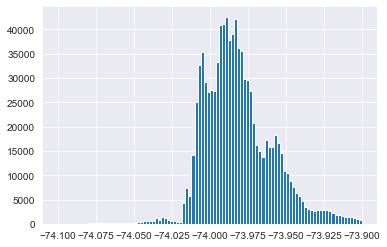

In [67]:
plt.hist(data['Lon'], bins=100, range=(-74.1, -73.9))
plt.plot();

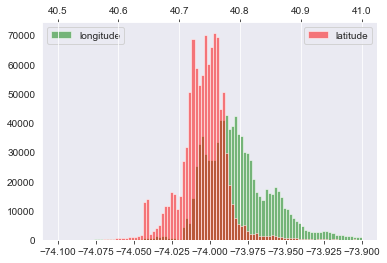

In [73]:
plt.hist(data['Lon'], bins=100, range=(-74.1, -73.9), color='g', alpha=.5, label='Longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lat'], bins=100, range=(40.5, 41), color='r', alpha=.5, label='Latitude')
plt.legend(loc='best')
plt.plot();

### Plotting Locations to Show Manhattan

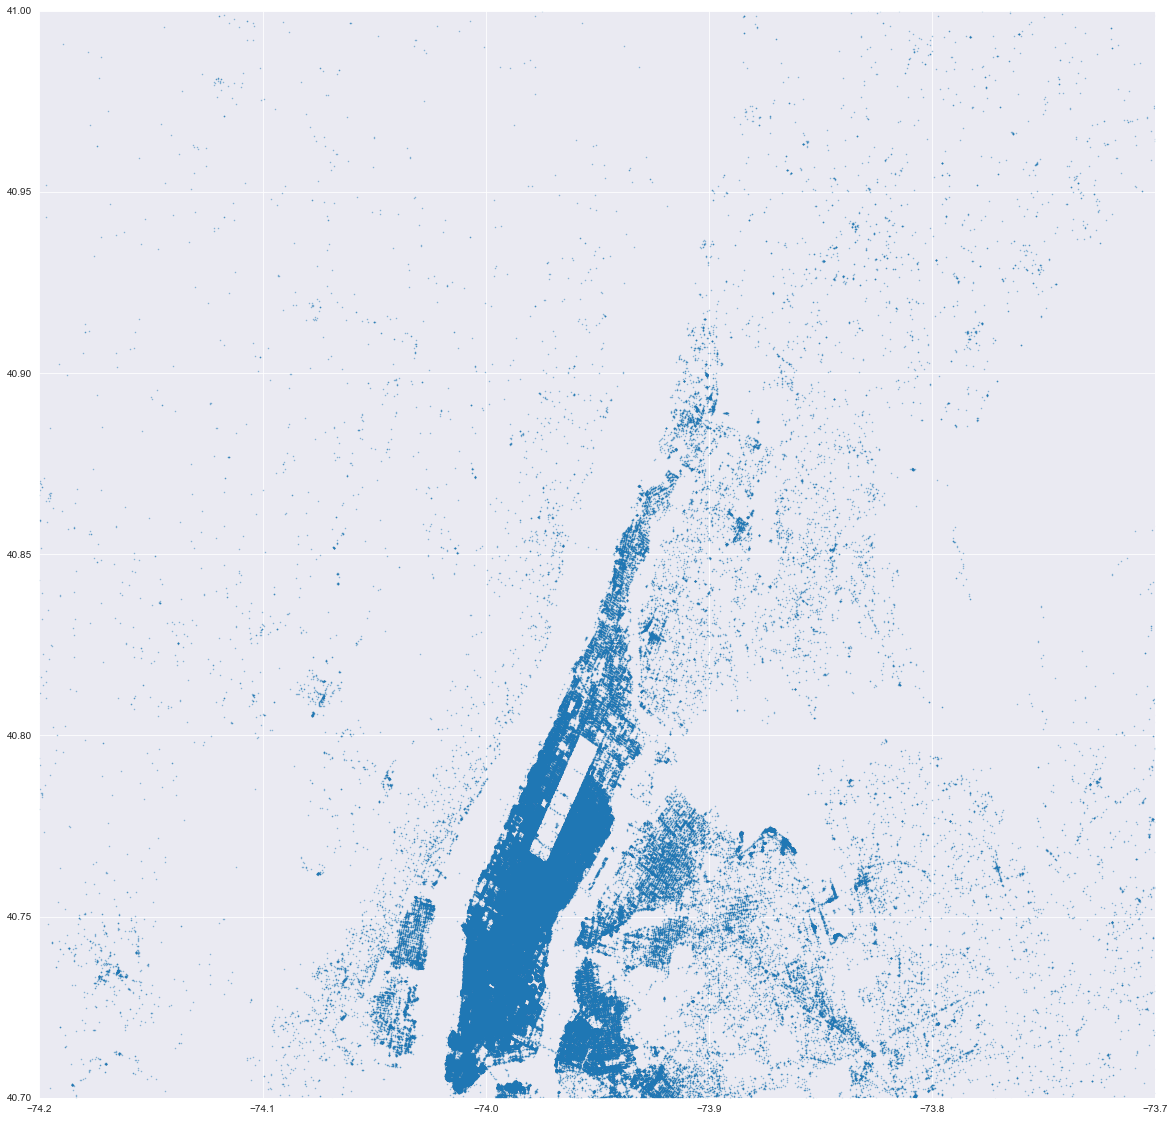

In [77]:
plt.figure(figsize=(20, 20))
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)
plt.plot(data['Lon'], data['Lat'], '.', ms=1, alpha=0.5);